<a href="https://colab.research.google.com/github/NoelRodriguezR/Data-Analysis-Tutorial/blob/main/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#Crear im dataset de emplo

data = {
    "Nombre": ["Juan", "Maria", "Pedro", "Ana", "Luis"],
    "Edad": [25, 30, 35, 40, 45],
    "Ciudad": ["Madrid", "Barcelona", "Valencia", "Sevilla", "Bilbao"],
    "Salario": [50000, 60000, 70000, 80000, 90000],
    "Experiencia":[2,5,10,3,15]
}

df = pd.DataFrame(data)
print(df)

  Nombre  Edad     Ciudad  Salario  Experiencia
0   Juan    25     Madrid    50000            2
1  Maria    30  Barcelona    60000            5
2  Pedro    35   Valencia    70000           10
3    Ana    40    Sevilla    80000            3
4   Luis    45     Bilbao    90000           15


In [2]:
#Antes de analizar, es crucial entender la estructura y calidad de los datos
# Pasos
#1. Ver las primeras filas
df.head()

,Nombre,Edad,Ciudad,Salario,Experiencia
0,Juan,25,Madrid,50000,2
1,Maria,30,Barcelona,60000,5
2,Pedro,35,Valencia,70000,10
3,Ana,40,Sevilla,80000,3
4,Luis,45,Bilbao,90000,15


In [3]:
#2. Informacion general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nombre       5 non-null      object
 1   Edad         5 non-null      int64 
 2   Ciudad       5 non-null      object
 3   Salario      5 non-null      int64 
 4   Experiencia  5 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 332.0+ bytes


In [4]:
#3. Estadisticas descriptiva
print(df.describe())

            Edad       Salario  Experiencia
count   5.000000      5.000000      5.00000
mean   35.000000  70000.000000      7.00000
std     7.905694  15811.388301      5.43139
min    25.000000  50000.000000      2.00000
25%    30.000000  60000.000000      3.00000
50%    35.000000  70000.000000      5.00000
75%    40.000000  80000.000000     10.00000
max    45.000000  90000.000000     15.00000


In [6]:
#4. Valores faltantes
df.isnull().sum()

,0
Nombre,0
Edad,0
Ciudad,0
Salario,0
Experiencia,0


In [8]:
#4. Limpieza de Datos
#Corregir o elimiar datos inconsistentes o faltantes

#1. Eliminar filas con valores faltantes
df = df.dropna()

In [9]:
#Eliminar duplicados
#2
df = df.drop_duplicates()

In [11]:
#3 Corregir tipo de datos (si es necesario)
df["Edad"] = df["Edad"].astype(int)

df.head()

,Nombre,Edad,Ciudad,Salario,Experiencia
0,Juan,25,Madrid,50000,2
1,Maria,30,Barcelona,60000,5
2,Pedro,35,Valencia,70000,10
3,Ana,40,Sevilla,80000,3
4,Luis,45,Bilbao,90000,15


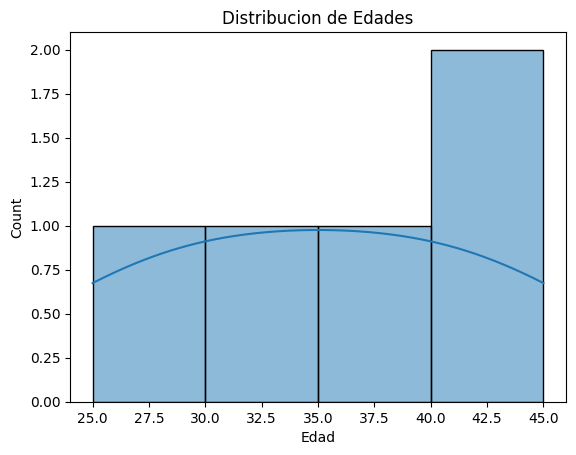

In [12]:
# 5 Analisis Exploratorio de Datos (EDA)
# Explorar los datos para identificar patrones, tendendias y relaciones

#1 Distribucion de variables numericas

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Edad"],kde =True)
plt.title("Distribucion de Edades")
plt.show()

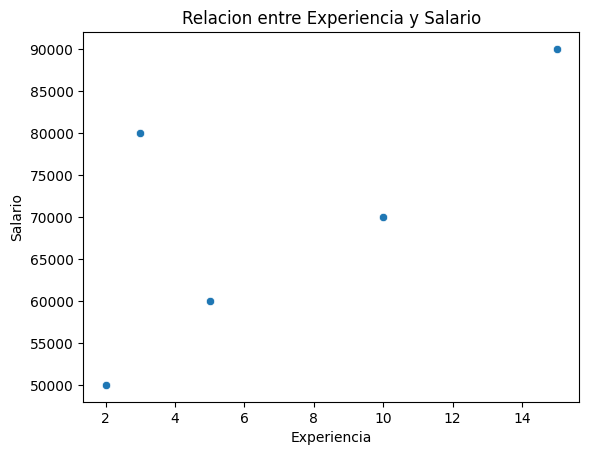

In [13]:
# 2. Relacion entre variables

sns.scatterplot(x="Experiencia", y="Salario", data=df)
plt.title("Relacion entre Experiencia y Salario")
plt.show()

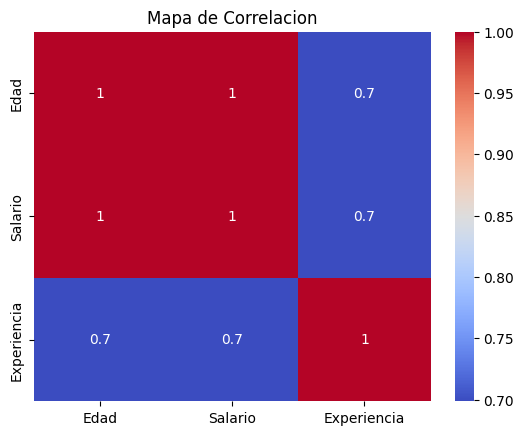

In [15]:
# 3. Correlacion entre variables numericas

# Select only numerical columns for correlation calculation
numerical_columns = df.select_dtypes(include=['number']).columns
correlacion = df[numerical_columns].corr()

sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.title("Mapa de Correlacion")
plt.show()

In [16]:
# 6. Agregacion y Agrupacion de Datos
#Agrupar datos para obtener insights mas profundos.

#1, Agrupar por ciudad y calcular el salario promedio

salario_por_ciudad = df.groupby("Ciudad")["Salario"].mean()
print(salario_por_ciudad)

Ciudad
Barcelona    60000.0
Bilbao       90000.0
Madrid       50000.0
Sevilla      80000.0
Valencia     70000.0
Name: Salario, dtype: float64


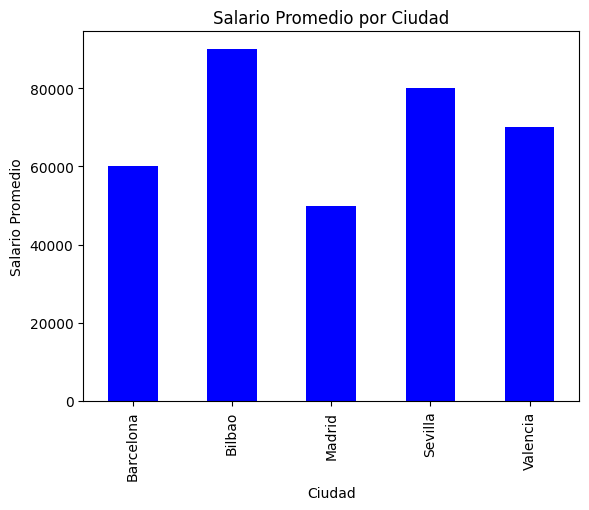

In [18]:
#2 Vizualizar los resultados
salario_por_ciudad.plot(kind="bar", color="blue")
plt.title("Salario Promedio por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Salario Promedio")
plt.show()

In [24]:
# 7. Analisis Estadistico
#Realizar analisis estadisticos para validar hipotesis.

#1. Prueba de hipotess (Ejemplo: Compara salarios entre ciudades)
import scipy.stats
madrid = df[df["Ciudad"]=="Madrid"]["Salario"]
barcelona = df[df["Ciudad"]=="Barcelona"]["Salario"]

t_stat, p_value = scipy.stats.ttest_ind(madrid,barcelona)

print(f"Estadistica t: {t_stat}, Valor p: {p_value}")

Estadistica t: nan, Valor p: nan


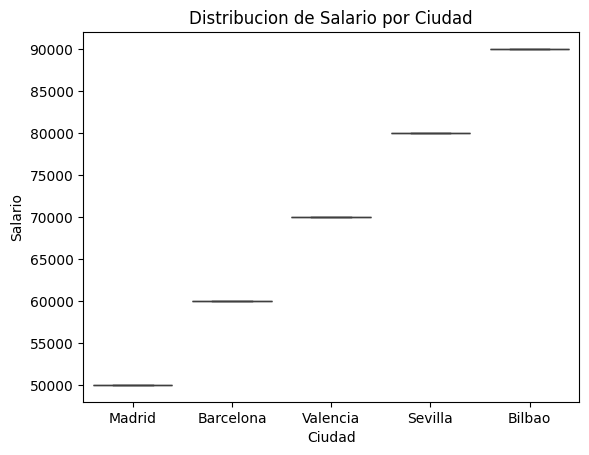

In [27]:
# 8. Visualizacion Avanzada
#Crear visualizaciones mas complejas para comincar insights

#1. Grafico de caja (boxplot):
sns.boxplot(x="Ciudad", y="Salario", data=df)
plt.title("Distribucion de Salario por Ciudad")
plt.show()

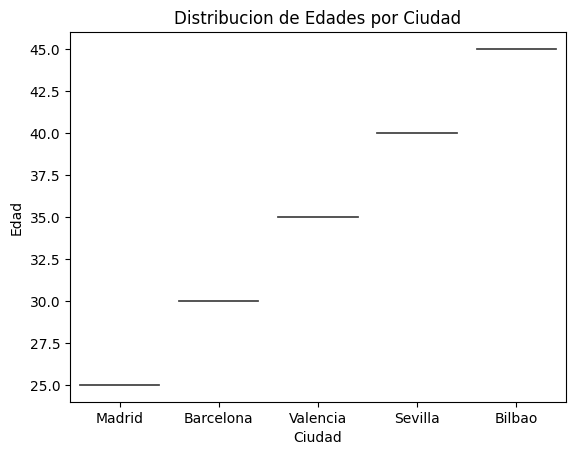

In [28]:
#2. Grafico de Violin
sns.violinplot(x="Ciudad", y="Edad", data=df)
plt.title("Distribucion de Edades por Ciudad")
plt.show()